# IA - Algoritmos de Busca (Exercícios)

## Importações

In [1]:
import numpy as np
from numpy import random
import random
import pandas as pd
from math import sqrt
import networkx as nx
from collections import deque
import time

In [4]:
#!pip install geopandas

## Funções

In [2]:
G = nx.Graph()

In [3]:
G.add_weighted_edges_from([
        ("Arad", "Sibiu", 140),
        ("Arad", "Timisoara", 118),
        ("Arad", "Zerind", 75),
        ("Bucharest", "Fagaras", 211),
        ("Bucharest", "Giurgiu", 90),
        ("Bucharest", "Pitesti", 101),
        ("Bucharest", "Urziceni", 85),
        ("Craiova", "Dobreta", 120),
        ("Craiova", "Pitesti", 138),
        ("Craiova", "Rimnicu_Vilcea", 146),
        ("Dobreta", "Mehadia", 75),
        ("Eforie", "Hirsova", 86),
        ("Fagaras", "Sibiu", 99),
        ("Hirsova", "Urziceni", 98),
        ("Iasi", "Neamt", 87),
        ("Iasi", "Vaslui", 92),
        ("Lugoj", "Mehadia", 70),
        ("Lugoj", "Timisoara", 111),
        ("Oradea", "Zerind", 71),
        ("Oradea", "Sibiu", 151),
        ("Pitesti", "Rimnicu_Vilcea", 97),
        ("Rimnicu_Vilcea", "Sibiu", 80),
        ("Urziceni", "Vaslui", 142)
    ])

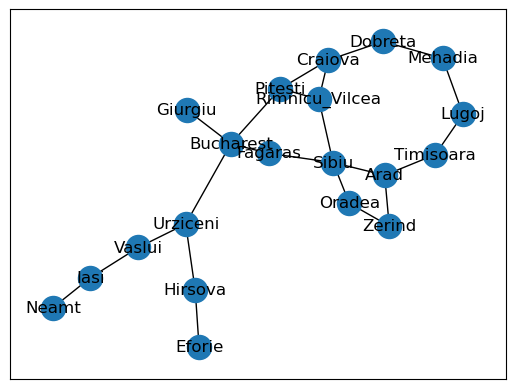

In [4]:
nx.draw_networkx(G, with_labels=True)

In [5]:
Heuristics = [
        ("Arad", 366),
        ("Bucharest", 0),
        ("Craiova", 160),
        ("Dobreta", 242),
        ("Eforie", 161),
        ("Fagaras", 178),
        ("Giurgiu", 77),
        ("Hirsova", 151),
        ("Iasi", 226),
        ("Lugoj", 244),
        ("Mehadia", 241),
        ("Neamt", 234),
        ("Oradea", 380),
        ("Pitesti", 98),
        ("Rimnicu_Vilcea", 193),
        ("Sibiu", 253),
        ("Timisoara", 329),
        ("Urziceni", 80),
        ("Vaslui", 199),
        ("Zerind", 374)
    ]


In [6]:
heuristics_dict = {k: v for k, v in Heuristics}

## Algoritmo BFS

In [ ]:
# Implemente aqui o algoritmo BFS

In [ ]:
G.nodes()

NodeView(('Arad', 'Sibiu', 'Timisoara', 'Zerind', 'Bucharest', 'Fagaras', 'Giurgiu', 'Pitesti', 'Urziceni', 'Craiova', 'Dobreta', 'Rimnicu_Vilcea', 'Mehadia', 'Eforie', 'Hirsova', 'Iasi', 'Neamt', 'Vaslui', 'Lugoj', 'Oradea'))

In [ ]:
def __BFS(G, s):
    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['dis'] = np.inf

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0

    # Fila (append (right), popleft)
    Q = deque()
    Q.append(s)
    while len(Q) != 0:
        u = Q.popleft()

        for v in G.neighbors(u):
            if G.nodes[v]['cor'] == 'branco':
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = G.nodes[u]['dis'] + 1
                G.nodes[v]['pre'] = u

                Q.append(v)

        G.nodes[u]['cor'] = 'preto'

        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    
def __caminho_minimo(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

def BFS(G, s, t):
    __BFS(G, s)
    return __caminho_minimo(G, s, t)


In [ ]:
BFS(G, 'Arad', 'Bucharest')
# __caminho_minimo(G, 'Arad', 'Bucharest')

['Arad', 'Sibiu', 'Fagaras', 'Bucharest']

## Algoritmo UCS (Custo Uniforme)

In [ ]:
# Implemente aqui o algoritmo UCS (Custo Uniforme)

In [14]:
def __UCS(graph, source, target, log=False):
    for v in graph.nodes():
        graph.nodes[v]['cor'] = 'branco'
        graph.nodes[v]['dis'] = 0

    graph.nodes[source]["cor"] = "cinza"

    queue = [source]
    finished = False
    best = None
    visited = 0

    while(len(queue) > 0):
        city = queue.pop(0)
        node = graph.nodes[city]
        if log:
            print(city)
        if city == target:
            best = node
            break
        if node["cor"] == "branco":
            node["cor"] = "amarelo"
        for neighbor_city in graph.neighbors(city):
            neighbor_node = graph.nodes[neighbor_city]
            distance = node["dis"] + G.adj[city][neighbor_city]["weight"]
            if neighbor_node["cor"] != "vermelho" or neighbor_city == target:
                visited += 1
                neighbor_node["cor"] = "vermelho"
                neighbor_node["dis"] = distance
                neighbor_node["pre"] = city
                queue.append(neighbor_city)
                if log:
                    print(f"{city} => {neighbor_city} ({neighbor_node['dis']})")
        if log:
            print("=" * 8)

        queue = sorted(queue, key=lambda d: graph.nodes[d]['dis'])
    return visited

def __caminho_minimo(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L



def UCS(G, s, t, log=False):
    visited = __UCS(G, s, t, log)
    total_dis = G.nodes[t]["dis"]
    print("Visited", visited)
    print("Total cost:", total_dis)
    return __caminho_minimo(G, s, t)

In [19]:
start_time = time.time()
print(UCS(G, 'Arad', 'Bucharest', log=False))
end_time = time.time()
print(f"Time: {((end_time - start_time) * 100.0)}") # ms
print(f"Visited: {len(list(filter(lambda i: G.nodes[i]['cor'] != 'branco', G.nodes)))}")

Visited 14
Total cost: 418
['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest']
Time: 0.049686431884765625
Visited: 13


## Algoritmo A-star

In [ ]:
# Implemente aqui o algoritmo A-star

In [30]:
def __ASTAR(graph, source, target, log=False):
    for v in graph.nodes():
        graph.nodes[v]['cor'] = 'branco'
        graph.nodes[v]['dis'] = 0
        graph.nodes[v]['gh'] = 0
        graph.nodes[v]['cost'] = 0

    graph.nodes[source]["cor"] = "cinza"

    queue = [source]
    best = None

    while(len(queue) > 0):
        city = queue.pop(0)
        node = graph.nodes[city]
        if log:
            print(f"{city} ({node['cost']})")
        if city == target:
            best = node
            break
        if node["cor"] == "branco":
            node["cor"] = "amarelo"
        for neighbor_city in graph.neighbors(city):
            neighbor_node = graph.nodes[neighbor_city]
            distance = node["dis"] + G.adj[city][neighbor_city]["weight"]
            gh = distance + heuristics_dict[neighbor_city]
            if neighbor_node["cor"] != "vermelho":
                neighbor_node["cor"] = "vermelho"
                neighbor_node["dis"] = distance
                neighbor_node["gh"] = gh
                neighbor_node["cost"] = gh
                neighbor_node["pre"] = city
                queue.append(neighbor_city)
                if log:
                    print(f"{city} => {neighbor_city}. Dis: ({neighbor_node['dis']}). GH: ({neighbor_node['gh']}). Cost: ({neighbor_node['cost']})")
        if log:
            print("=" * 8)

        queue = sorted(queue, key=lambda d: graph.nodes[d]['cost'])

def __caminho_minimo(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L



def ASTAR(G, s, t, log=False):
    __ASTAR(G, s, t, log)
    total_dis = G.nodes[t]["dis"]
    print("Total cost:", total_dis)
    return __caminho_minimo(G, s, t)

In [31]:
start_time = time.time()
print(ASTAR(G, 'Arad', 'Bucharest', log=True))
end_time = time.time()
print(f"Time: {((end_time - start_time) * 100.0)}") # ms
print(f"Visited: {len(list(filter(lambda i: G.nodes[i]['cor'] != 'branco', G.nodes)))}")

Arad (0)
Arad => Sibiu. Dis: (140). GH: (393). Cost: (393)
Arad => Timisoara. Dis: (118). GH: (447). Cost: (447)
Arad => Zerind. Dis: (75). GH: (449). Cost: (449)
Sibiu (393)
Sibiu => Arad. Dis: (280). GH: (646). Cost: (646)
Sibiu => Fagaras. Dis: (239). GH: (417). Cost: (417)
Sibiu => Oradea. Dis: (291). GH: (671). Cost: (671)
Sibiu => Rimnicu_Vilcea. Dis: (220). GH: (413). Cost: (413)
Rimnicu_Vilcea (413)
Rimnicu_Vilcea => Craiova. Dis: (366). GH: (526). Cost: (526)
Rimnicu_Vilcea => Pitesti. Dis: (317). GH: (415). Cost: (415)
Pitesti (415)
Pitesti => Bucharest. Dis: (418). GH: (418). Cost: (418)
Fagaras (417)
Bucharest (418)
Total cost: 418
['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest']
Time: 0.04966259002685547
Visited: 10


In [98]:
def __ASTAR_early_stopping(graph, source, target, log=False):
    for v in graph.nodes():
        graph.nodes[v]['cor'] = 'branco'
        graph.nodes[v]['dis'] = 0
        graph.nodes[v]['gh'] = 0
        graph.nodes[v]['cost'] = 0

    graph.nodes[source]["cor"] = "cinza"

    queue = [source]
    best = None

    while(len(queue) > 0):
        city = queue.pop(0)
        node = graph.nodes[city]
        if node["cor"] == "branco":
            node["cor"] = "amarelo"
        for neighbor_city in graph.neighbors(city):
            neighbor_node = graph.nodes[neighbor_city]
            distance = node["dis"] + G.adj[city][neighbor_city]["weight"]
            gh = node["dis"] + heuristics_dict[neighbor_city]
            if neighbor_node["cor"] != "vermelho":
                neighbor_node["cor"] = "vermelho"
                neighbor_node["dis"] = distance
                neighbor_node["gh"] = gh
                neighbor_node["cost"] = distance + gh
                neighbor_node["pre"] = city
                queue.append(neighbor_city)
                if log:
                    print(f"{city} => {neighbor_city}. Dis: ({neighbor_node['dis']}). GH: ({neighbor_node['gh']}). Cost: ({neighbor_node['cost']})")
                if neighbor_city == target:
                    best = neighbor_node
                    return
        if log:
            print("=" * 8)

    queue = sorted(queue, key=lambda d: graph.nodes[d]['cost'])

def __caminho_minimo(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L



def ASTAR_early_stopping(G, s, t, log=False):
    __ASTAR_early_stopping(G, s, t, log)
    total_dis = G.nodes[t]["dis"]
    print("Total cost:", total_dis)
    return __caminho_minimo(G, s, t)

In [108]:
start_time = time.time()
print(ASTAR_early_stopping(G, 'Arad', 'Bucharest', log=False))
end_time = time.time()
print(f"Time: {((end_time - start_time) * 100.00)}") # ms
print((end_time - start_time) * 100.00)
print(f"Visited: {len(list(filter(lambda i: G.nodes[i]['cor'] != 'branco', G.nodes)))}")

Total cost: 450
['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Time: 0.049686431884765625
0.049686431884765625
Visited: 9


## Programa Principal

In [ ]:
# Chame aqui apropriadamente os algoritmos para resolver o problema